In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 学習データを読み込む
train = np.loadtxt('click.csv', delimiter=',', dtype='int', skiprows=1)
train_x = train[:, 0]
train_y = train[:, 1]

In [3]:
# 標準化
mu = train_x.mean()
sigma = train_x.std()

In [4]:
def standardize(x):
    return (x - mu) / sigma

In [5]:
train_z = standardize(train_x)

In [6]:
# パラメータを初期化
theta = np.random.rand(3)

In [7]:
# 学習データの行列を作る
def to_matrix(x):
    return np.vstack([np.ones(x.size), x, x ** 2]).T

In [8]:
X = to_matrix(train_z)

In [9]:
# 予測関数
def f(x):
    return np.dot(x, theta)

In [10]:
# 目的関数
def E(x, y):
    return 0.5 * np.sum((y - f(x)) ** 2)

In [11]:
# 学習率
ETA = 1e-3

In [12]:
# 誤差の差分
diff = 1

In [13]:
# 更新回数
count = 0

In [14]:
# 誤差の差分が0.01以下になるまでパラメータ更新を繰り返す
error = E(X, train_y)
while diff > 1e-2:
    # 更新結果を一時変数に保存
    theta = theta - ETA * np.dot(f(X) - train_y, X)

    # 前回の誤差との差分を計算
    current_error = E(X, train_y)
    diff = error - current_error
    error = current_error

    # ログの出力
    count += 1
    log = '{}回目: theta = {}, 差分 = {:.4f}'
    print(log.format(count, theta, diff))

1回目: theta = [9.53192256 2.29306287 9.35852276], 差分 = 152906.3649
2回目: theta = [17.73711365  4.12975895 17.75899985], 差分 = 137665.2242
3回目: theta = [25.61019138  5.94137409 25.63192485], 差分 = 124027.4277
4回目: theta = [33.16834905  7.72767811 33.00688989], 差分 = 111822.1769
5回目: theta = [40.42784428  9.48848646 39.91185364], 差分 = 100896.9282
6回目: theta = [47.40405032 11.22365709 46.3732312 ], 差分 = 91115.4406
7回目: theta = [54.11150469 12.93308741 52.41597919], 差分 = 82356.0310
8回目: theta = [60.56395501 14.61671152 58.06367598], 差分 = 74510.0171
9回目: theta = [66.77440239 16.27449752 63.33859765], 差分 = 67480.3264
10回目: theta = [72.75514239 17.90644509 68.26178966], 差分 = 61180.2542
11回目: theta = [78.51780375 19.51258306 72.85313464], 差分 = 55532.3550
12回目: theta = [84.07338498 21.0929673  77.13141644], 差分 = 50467.4516
13回目: theta = [89.43228895 22.64767862 81.11438062], 差分 = 45923.7511
14回目: theta = [94.60435556 24.1768208  84.81879167], 差分 = 41846.0553
15回目: theta = [99.59889262 25.68051883 88

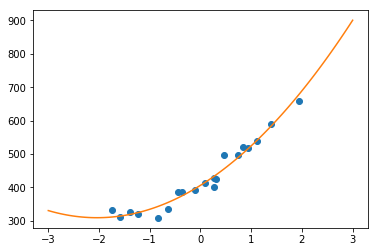

In [15]:
# プロットして確認
x = np.linspace(-3, 3, 100)
plt.plot(train_z, train_y, 'o')
plt.plot(x, f(to_matrix(x)))
plt.show()